# <노인복지센터 현황 시각화 프로젝트> &#128214;
	


## PART 3 . 복지시설 시각화 
### 1) 데이터 전처리

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc# rc == run configure(configuration file)
import googlemaps
import json
import folium

# 경기도 2020 노인 인구수 & 노인비율 데이터 @ 경기도 데이터드림
# 원본 데이터 및 전처리 작업을 위한 파이썬 코드 @ folder named [ Original data source & data preprocessing (5대범죄 & 인구수) ] 

old = pd.read_excel('경기도_노인인구수(통계청).xlsx', encoding='utf-8') 
#dataframe name = old
old.head(32)

행정구역  노인인구비율   노인인구수     전체인구
0    수원시    10.8  128506  1191542
1    성남시    13.8  129781   939748
2   의정부시    14.9   67860   455520
3    안양시    13.2   73890   558017
4    부천시    13.2  108709   825700
5    광명시    13.6   42538   312774
6    평택시    12.3   64322   523881
7   동두천시    20.0   18856    94143
8    안산시    10.6   69284   654450
9    고양시    13.1  141077  1076996
10   과천시    14.0    8596    61309
11   구리시    13.2   26229   198461
12  남양주시    13.7   97175   707485
13   오산시     9.3   21258   228111
14   시흥시     9.1   43814   481430
15   군포시    12.8   35225   276039
16   의왕시    13.3   21726   163622
17   하남시    12.6   35678   283256
18   용인시    13.0  139472  1073115
19   파주시    13.8   62790   456073
20   이천시    13.9   30299   218465
21   안성시    17.2   31853   185305
22   김포시    12.3   55111   449039
23   화성시     8.7   72923   836662
24   광주시    13.0   49068   377525
25   양주시    15.5   34958   226015
26   포천시    19.4   28651   148015
27   여주시    21.4   23852   111341
28   연천군    25.9   11279    43618
29   가평군    25.6   16014    62662
30   양평군    25.2   29614   117701

In [33]:
area_old = pd.pivot_table(old, index='행정구역', aggfunc=np.sum)
area_old.head()

노인인구비율   노인인구수     전체인구
행정구역                         
가평군     25.6   16014    62662
고양시     13.1  141077  1076996
과천시     14.0    8596    61309
광명시     13.6   42538   312774
광주시     13.0   49068   377525

In [35]:
#노인인구 파일-행정구역에 경도와 위도 추가하기

gmaps = googlemaps.Client(key="개인키 입력") # -- input your key --

lat = []
lng = []

for name in old['행정구역']:
    # gmaps.reverse_geocode((longitude 값, latitude 값), language="ko") == 경도 & 위도 값으로 주소값 가져오기
    # gmaps.geocode('한글 주소', language="ko") 로 위도/경도, 우편번호까지 알 수 있음
    tmpMap = gmaps.geocode(name) # ex) 성남시
    tmpLoc = tmpMap[0].get('geometry') # 배열 형태( [~] )로 들어오기 때문에 [0]으로 호출
    lat.append(tmpLoc['location']['lat']) # dict(tmpLoc)의 데이터는 dict['key값'] 로 value 호출
    lng.append(tmpLoc['location']['lng'])
    
old['위도'] = lat
old['경도'] = lng

old.head()

행정구역  노인인구비율   노인인구수     전체인구         위도          경도
0   수원시    10.8  128506  1191542  37.263573  127.028601
1   성남시    13.8  129781   939748  37.444917  127.138868
2  의정부시    14.9   67860   455520  37.738098  127.033682
3   안양시    13.2   73890   558017  37.394253  126.956821
4   부천시    13.2  108709   825700  37.503414  126.766031

In [36]:
#columns(열) 순서 변경하기
old = old.reindex(columns=['행정구역','노인인구수','전체인구','노인인구비율','경도','위도'])
old

# # 새롭게 행 이름을 짓기
# sigu_df.rename(columns = {'인구수(명)':'노인인구수',
#                         '비율(%)':'노인비율'}, inplace=True) # inplace 옵션 == 덮어쓰기 여부
# sigu_df.head()

행정구역   노인인구수     전체인구  노인인구비율          경도         위도
0    수원시  128506  1191542    10.8  127.028601  37.263573
1    성남시  129781   939748    13.8  127.138868  37.444917
2   의정부시   67860   455520    14.9  127.033682  37.738098
3    안양시   73890   558017    13.2  126.956821  37.394253
4    부천시  108709   825700    13.2  126.766031  37.503414
5    광명시   42538   312774    13.6  126.864289  37.478488
6    평택시   64322   523881    12.3  127.112945  36.992108
7   동두천시   18856    94143    20.0  127.060507  37.903411
8    안산시   69284   654450    10.6  126.830885  37.321878
9    고양시  141077  1076996    13.1  126.832020  37.658360
10   과천시    8596    61309    14.0  126.987445  37.429246
11   구리시   26229   198461    13.2  127.129565  37.594312
12  남양주시   97175   707485    13.7  127.216528  37.636003
13   오산시   21258   228111     9.3  127.077221  37.149810
14   시흥시   43814   481430     9.1  126.803102  37.379888
15   군포시   35225   276039    12.8  126.935174  37.361670
16   의왕시   21726   163622    13.3  126.968310  37.344701
17   하남시   35678   283256    12.6  127.214892  37.539265
18   용인시  139472  1073115    13.0  127.177554  37.241086
19   파주시   62790   456073    13.8  126.780178  37.759869
20   이천시   30299   218465    13.9  127.434822  37.271995
21   안성시   31853   185305    17.2  127.279679  37.007970
22   김포시   55111   449039    12.3  126.715632  37.615246
23   화성시   72923   836662     8.7  126.831189  37.199493
24   광주시   49068   377525    13.0  127.256141  37.417141
25   양주시   34958   226015    15.5  127.045845  37.785288
26   포천시   28651   148015    19.4  127.200355  37.894915
27   여주시   23852   111341    21.4  127.637163  37.298024
28   연천군   11279    43618    25.9  127.074833  38.096444
29   가평군   16014    62662    25.6  127.509883  37.831540
30   양평군   29614   117701    25.2  127.487561  37.491219

In [37]:
# 인구수 기준으로 오름차순 정렬하기

# '노인인구수'을 기준으로 정렬할 때?
old.sort_values(by='노인인구수', ascending=False, inplace=True) # ascending=False : 내림차순, inplace=True : 덮어쓰기
old

행정구역   노인인구수     전체인구  노인인구비율          경도         위도
9    고양시  141077  1076996    13.1  126.832020  37.658360
18   용인시  139472  1073115    13.0  127.177554  37.241086
1    성남시  129781   939748    13.8  127.138868  37.444917
0    수원시  128506  1191542    10.8  127.028601  37.263573
4    부천시  108709   825700    13.2  126.766031  37.503414
12  남양주시   97175   707485    13.7  127.216528  37.636003
3    안양시   73890   558017    13.2  126.956821  37.394253
23   화성시   72923   836662     8.7  126.831189  37.199493
8    안산시   69284   654450    10.6  126.830885  37.321878
2   의정부시   67860   455520    14.9  127.033682  37.738098
6    평택시   64322   523881    12.3  127.112945  36.992108
19   파주시   62790   456073    13.8  126.780178  37.759869
22   김포시   55111   449039    12.3  126.715632  37.615246
24   광주시   49068   377525    13.0  127.256141  37.417141
14   시흥시   43814   481430     9.1  126.803102  37.379888
5    광명시   42538   312774    13.6  126.864289  37.478488
17   하남시   35678   283256    12.6  127.214892  37.539265
15   군포시   35225   276039    12.8  126.935174  37.361670
25   양주시   34958   226015    15.5  127.045845  37.785288
21   안성시   31853   185305    17.2  127.279679  37.007970
20   이천시   30299   218465    13.9  127.434822  37.271995
30   양평군   29614   117701    25.2  127.487561  37.491219
26   포천시   28651   148015    19.4  127.200355  37.894915
11   구리시   26229   198461    13.2  127.129565  37.594312
27   여주시   23852   111341    21.4  127.637163  37.298024
16   의왕시   21726   163622    13.3  126.968310  37.344701
13   오산시   21258   228111     9.3  127.077221  37.149810
7   동두천시   18856    94143    20.0  127.060507  37.903411
29   가평군   16014    62662    25.6  127.509883  37.831540
28   연천군   11279    43618    25.9  127.074833  38.096444
10   과천시    8596    61309    14.0  126.987445  37.429246

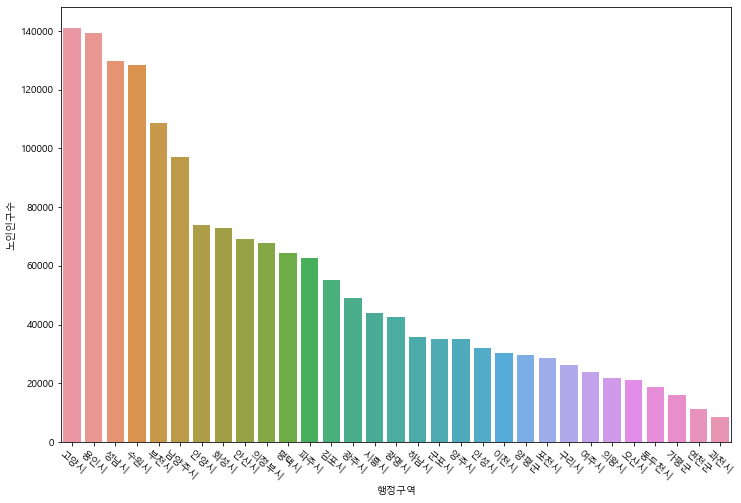

In [38]:
plt.figure(figsize=(12,8)) #size 조절 
plt.xticks(rotation = 50000) #x축 조절 
sns.barplot(data = old.sort_values(by='노인인구수', ascending=False), 
            x = "행정구역", 
            y = "노인인구수" ) 
plt.show()

### 2) 지도 시각화

In [39]:
#한글데이터 시각화

# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)


In [ ]:
#!pip install folium==0.5.0

In [40]:
# import warnings
# warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'Gyeonggi_municipalities-geo.json'
#경기도 행정구역만 정리된 json파일 불러오기
geo_str = json.load(open(geo_path, encoding='utf-8'))

geo_str['features'][0]

{'type': 'Feature',
 'id': '안산시',
 'properties': {'ID_0': 211,
  'ISO': 'KOR',
  'NAME_0': 'South Korea',
  'ID_1': 8,
  'NAME_1': 'Gyeonggi-do',
  'ID_2': 78,
  'NAME_2': 'Ansan',
  'NL_NAME_2': '안산시',
  'VARNAME_2': None,
  'TYPE_2': 'Si',
  'ENGTYPE_2': 'City'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[126.83533477783203, 37.40499877929699],
    [126.8362274169923, 37.39935684204107],
    [126.83596801757835, 37.39345932006847],
    [126.83588409423828, 37.38461303710949],
    [126.83646392822266, 37.376689910888786],
    [126.83998107910179, 37.36566543579096],
    [126.84091186523438, 37.358818054199276],
    [126.84096527099621, 37.35172271728521],
    [126.84058380126964, 37.342464447021484],
    [126.83953857421875, 37.33327865600586],
    [126.83107757568371, 37.33131408691412],
    [126.82127380371094, 37.32530975341808],
    [126.81544494628918, 37.322814941406364],
    [126.80957794189453, 37.319950103759766],
    [126.80423736572266, 37.317790985107365],
    [1

In [41]:
from pyprnt import prnt
prnt(geo_str)
#파이썬의 dictionary

┌────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│type    │FeatureCollection                                                                                            │
│features│┌──┬────────────────────────────────────────────────────────────────────────────────────────────────────────┐│
│        ││0 │┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐││
│        ││  ││type      │Feature                                                                                    │││
│        ││  ││id        │안산시                                                                                        │││
│        ││  ││properties│┌─────────┬───────────┐                                                                    │││
│        ││  ││          ││ID_0     │211        │                                                                    │││
│        ││  ││          ││ISO  

│        ││  ││          ││           ││ ││   ││1│37.31557464599621│ ││                                             ││││
│        ││  ││          ││           ││ ││   │└─┴─────────────────┘ ││                                             ││││
│        ││  ││          ││           ││ ││214│┌─┬─────────────────┐ ││                                             ││││
│        ││  ││          ││           ││ ││   ││0│126.7218017578125│ ││                                             ││││
│        ││  ││          ││           ││ ││   ││1│37.31569290161127│ ││                                             ││││
│        ││  ││          ││           ││ ││   │└─┴─────────────────┘ ││                                             ││││
│        ││  ││          ││           ││ ││215│┌─┬─────────────────┐ ││                                             ││││
│        ││  ││          ││           ││ ││   ││0│126.7216033935548│ ││                                             ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││  ││0│127.11755371093761│││                                              ││││
│        ││  ││          ││           ││ ││  ││1│37.91715240478527 │││                                              ││││
│        ││  ││          ││           ││ ││  │└─┴──────────────────┘││                                              ││││
│        ││  ││          ││           ││ │└──┴──────────────────────┘│                                              ││││
│        ││  ││          ││           │└─┴───────────────────────────┘                                              ││││
│        ││  ││          │└───────────┴─────────────────────────────────────────────────────────────────────────────┘│││
│        ││  │└──────────┴───────────────────────────────────────────────────────────────────────────────────────────┘││
│        ││5 │┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐││
│        ││  ││type      │Featur

│        ││  ││          ││           ││ ││ ││    ││0│126.57514190673828││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.58708190917969 ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││100 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.57485961914108││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.58708190917969 ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││101 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││406 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.53680419921875││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.64699554443365 ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││407 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.53680419921875││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.64736175537132 ││││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││    ││0│126.5229187011721│ │││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.71069335937523│ │││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴─────────────────┘ │││                                        ││││
│        ││  ││          ││           ││ ││ ││704 │┌─┬─────────────────┐ │││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.5229187011721│ │││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.71125030517578│ │││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴─────────────────┘ │││                                        ││││
│        ││  ││          ││           ││ ││ ││705 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││994 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.54125213623047││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.77069473266607 ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││995 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.54125213623047││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.771804809570426││││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││   ││1│37.292114257812614│││                                             ││││
│        ││  ││          ││           ││ ││   │└─┴──────────────────┘││                                             ││││
│        ││  ││          ││           ││ ││39 │┌─┬──────────────────┐││                                             ││││
│        ││  ││          ││           ││ ││   ││0│127.38110351562511│││                                             ││││
│        ││  ││          ││           ││ ││   ││1│37.289306640625   │││                                             ││││
│        ││  ││          ││           ││ ││   │└─┴──────────────────┘││                                             ││││
│        ││  ││          ││           ││ ││40 │┌─┬───────────────┐   ││                                             ││││
│        ││  ││          ││           ││ ││   ││0│127.37548828125│   ││                                             ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││  │└─┴──────────────────┘││  │                                       ││││
│        ││  ││          ││           ││  ││ ││38│┌─┬──────────────────┐││  │                                       ││││
│        ││  ││          ││           ││  ││ ││  ││0│126.72125244140625│││  │                                       ││││
│        ││  ││          ││           ││  ││ ││  ││1│37.044303894043026│││  │                                       ││││
│        ││  ││          ││           ││  ││ ││  │└─┴──────────────────┘││  │                                       ││││
│        ││  ││          ││           ││  ││ ││39│┌─┬──────────────────┐││  │                                       ││││
│        ││  ││          ││           ││  ││ ││  ││0│126.72125244140625│││  │                                       ││││
│        ││  ││          ││           ││  ││ ││  ││1│37.044582366943416│││  │                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││   │└─┴─────────────────┘ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││79 │┌─┬─────────────────┐ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││0│126.6220855712894│ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││1│37.16319274902355│ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   │└─┴─────────────────┘ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││80 │┌─┬─────────────────┐ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││0│126.6220855712894│ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││1│37.16291809082037│ ││ │                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││   │└─┴──────────────────┘││ │                                       ││││
│        ││  ││          ││           ││  ││ ││17 │┌─┬──────────────────┐││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││0│126.52208709716831│││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││1│37.25958251953125 │││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   │└─┴──────────────────┘││ │                                       ││││
│        ││  ││          ││           ││  ││ ││18 │┌─┬─────────────────┐ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││0│126.5223617553711│ ││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││1│37.25958251953125│ ││ │                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││   ││1│37.235416412353686│││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   │└─┴──────────────────┘││ │                                       ││││
│        ││  ││          ││           ││  ││ ││342│┌─┬──────────────────┐││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││0│126.51985931396518│││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││1│37.235416412353686│││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   │└─┴──────────────────┘││ │                                       ││││
│        ││  ││          ││           ││  ││ ││343│┌─┬──────────────────┐││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││0│126.51985931396518│││ │                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││   ││0│126.67652893066418│││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││1│37.282081604003906│││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   │└─┴──────────────────┘││ │                                       ││││
│        ││  ││          ││           ││  ││ ││106│┌─┬──────────────────┐││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││0│126.67652893066418│││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   ││1│37.28236389160185 │││ │                                       ││││
│        ││  ││          ││           ││  ││ ││   │└─┴──────────────────┘││ │                                       ││││
│        ││  ││          ││           ││  ││ ││107│┌─┬──────────────────┐││ │                                       ││││
│        ││  ││          ││     

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││1936│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.53291320800793││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.28958511352556 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││1937│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.53319549560558││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.28958511352556 ││││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    ││0│126.57559967041016││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.29152679443371 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││2129│┌─┬─────────────────┐ │││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.5754165649414│ │││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.29152679443371│ │││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴─────────────────┘ │││                                       ││││
│        ││  ││          ││           ││  ││ ││2130│┌─┬─────────────────┐ │││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    ││0│126.79125213623047││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.0098609924317  ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││235 │┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.79125213623047││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.01013946533209 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││236 │┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││548 │┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.73236083984375││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.073749542236385││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││549 │┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.73180389404297││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.073749542236385││││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││840 │┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.72069549560581││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.08430480957031 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││841 │┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.72125244140625││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.08430480957031 ││││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││1160│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.76152801513695││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.105693817138615││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││1161│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.76152801513695││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.105972290039176││││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││1431│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.80458068847656││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.13680648803728 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││1432│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.80486297607422││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.13680648803728 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││1712│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.79875183105469││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.160972595214844││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││1713│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.79902648925827││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.160972595214844││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││2078│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.73652648925815││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.14791488647461 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││2079│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.73643493652355││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.14791488647461 ││││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    ││1│37.11902618408226 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││2432│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.68486022949241││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.11958312988281 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││2433│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.68514251709007││││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││2829│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.65847015380893││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.17152786254883 ││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││2830│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.65736389160168││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.17152786254883 ││││                                       ││││
│        ││  ││          ││     

│        ││  ││          ││           ││  ││ ││    ││0│126.67375183105469││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.226528167724666││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││3150│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││0│126.67346954345749││││                                       ││││
│        ││  ││          ││           ││  ││ ││    ││1│37.226528167724666││││                                       ││││
│        ││  ││          ││           ││  ││ ││    │└─┴──────────────────┘│││                                       ││││
│        ││  ││          ││           ││  ││ ││3151│┌─┬──────────────────┐│││                                       ││││
│        ││  ││          ││     

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




│        ││  ││          ││           ││ ││   │└─┴──────────────────┘││                                             ││││
│        ││  ││          ││           ││ ││399│┌─┬──────────────────┐││                                             ││││
│        ││  ││          ││           ││ ││   ││0│126.85958099365234│││                                             ││││
│        ││  ││          ││           ││ ││   ││1│36.94985961914068 │││                                             ││││
│        ││  ││          ││           ││ ││   │└─┴──────────────────┘││                                             ││││
│        ││  ││          ││           ││ ││400│┌─┬──────────────────┐││                                             ││││
│        ││  ││          ││           ││ ││   ││0│126.85874938964844│││                                             ││││
│        ││  ││          ││           ││ ││   ││1│36.94985961914068 │││                                             ││││
│        ││  ││          ││    

│        ││  ││          ││           ││ ││712│┌─┬──────────────────┐││                                             ││││
│        ││  ││          ││           ││ ││   ││0│126.81986236572266│││                                             ││││
│        ││  ││          ││           ││ ││   ││1│36.99347305297857 │││                                             ││││
│        ││  ││          ││           ││ ││   │└─┴──────────────────┘││                                             ││││
│        ││  ││          ││           ││ ││713│┌─┬──────────────────┐││                                             ││││
│        ││  ││          ││           ││ ││   ││0│126.81903076171886│││                                             ││││
│        ││  ││          ││           ││ ││   ││1│36.99347305297857 │││                                             ││││
│        ││  ││          ││           ││ ││   │└─┴──────────────────┘││                                             ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││82  │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.70625305175781││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.32430648803711 ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││83  │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.70625305175781││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.32440948486328 ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││    ││1│37.296806335449276││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││415 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.585693359375  ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.296527862548885││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││416 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.58541870117222││││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││741 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.68819427490257││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.334583282470646││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││742 │┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.68819427490257││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.33486175537104 ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││    ││1│37.387916564941406││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││1044│┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.73402404785156││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.38847351074236 ││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││1045│┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.73374938964855││││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││    ││1│37.401805877685604││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││1419│┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.75069427490234││││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││1│37.401805877685604││││                                        ││││
│        ││  ││          ││           ││ ││ ││    │└─┴──────────────────┘│││                                        ││││
│        ││  ││          ││           ││ ││ ││1420│┌─┬──────────────────┐│││                                        ││││
│        ││  ││          ││           ││ ││ ││    ││0│126.75069427490234││││                                        ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││   │└─┴──────────────────┘││                                             ││││
│        ││  ││          ││           ││ ││61 │┌─┬──────────────────┐││                                             ││││
│        ││  ││          ││           ││ ││   ││0│127.68829345703125│││                                             ││││
│        ││  ││          ││           ││ ││   ││1│37.36407470703125 │││                                             ││││
│        ││  ││          ││           ││ ││   │└─┴──────────────────┘││                                             ││││
│        ││  ││          ││           ││ ││62 │┌─┬──────────────────┐││                                             ││││
│        ││  ││          ││           ││ ││   ││0│127.68267822265636│││                                             ││││
│        ││  ││          ││           ││ ││   ││1│37.366882324218864│││                                             ││││
│        ││  ││          ││     

│        ││  ││          ││           ││ ││ ││   │└─┴──────────────────┘│││                                         ││││
│        ││  ││          ││           ││ ││ ││131│┌─┬──────────────────┐│││                                         ││││
│        ││  ││          ││           ││ ││ ││   ││0│126.96199035644554││││                                         ││││
│        ││  ││          ││           ││ ││ ││   ││1│38.15790176391607 ││││                                         ││││
│        ││  ││          ││           ││ ││ ││   │└─┴──────────────────┘│││                                         ││││
│        ││  ││          ││           ││ ││ ││132│┌─┬──────────────────┐│││                                         ││││
│        ││  ││          ││           ││ ││ ││   ││0│126.9617691040039 ││││                                         ││││
│        ││  ││          ││           ││ ││ ││   ││1│38.159271240234375││││                                         ││││
│        ││  ││          ││     

In [42]:


# tiles : 지도 타입 (default type or "Stamen Terrain" or "Stamen Toner")
# location : 초기 지도 center 위치 -> 경기도 좌표

map = folium.Map(location=[37.5969947,126.5354523], zoom_start=8) 
map

In [43]:
#folium 라이브러리를 이용해서 지도 위에 경기도 행정구역별 경계를 표시한다.

map = folium.Map(location=[37.5969947,126.5354523],
                 zoom_start=8)

with open('Gyeonggi_municipalities-geo.json',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()

folium.GeoJson(
    geo,
    name='Gyeonggi_municipalities'
).add_to(map)


map.save('1_경기도행정구역시각화.html') #결과화면 저장
map


In [44]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '안산시',
   'properties': {'ID_0': 211,
    'ISO': 'KOR',
    'NAME_0': 'South Korea',
    'ID_1': 8,
    'NAME_1': 'Gyeonggi-do',
    'ID_2': 78,
    'NAME_2': 'Ansan',
    'NL_NAME_2': '안산시',
    'VARNAME_2': None,
    'TYPE_2': 'Si',
    'ENGTYPE_2': 'City'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[126.83533477783203, 37.40499877929699],
      [126.8362274169923, 37.39935684204107],
      [126.83596801757835, 37.39345932006847],
      [126.83588409423828, 37.38461303710949],
      [126.83646392822266, 37.376689910888786],
      [126.83998107910179, 37.36566543579096],
      [126.84091186523438, 37.358818054199276],
      [126.84096527099621, 37.35172271728521],
      [126.84058380126964, 37.342464447021484],
      [126.83953857421875, 37.33327865600586],
      [126.83107757568371, 37.33131408691412],
      [126.82127380371094, 37.32530975341808],
      [126.81544494628918, 37.322814941406364],
  

In [45]:
# 경기도 행정구역별 노인 인구수 시각화
# Choropleth map : 정의 @ https://goo.gl/yrTRHU, folium 공식문서 @ https://goo.gl/5UgneX
# Another available library for Choropleth map : Altair @ https://altair-viz.github.io/gallery/choropleth.html


map = folium.Map(location=[37.5969947,126.5354523], zoom_start=10)

map.choropleth(
    geo_data = geo_str, # 경기도 행정구역별 polygon drawing
    data = old, # 시각화의 대상이 될 데이터
    columns = ['행정구역','노인인구수'], # 1) df의 index 칼럼을 가져와 인식하고
    fill_color = 'PuRd', #PuRd, YlGnBu <- color brewer (http://colorbrewer2.org/) : ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’
    key_on = 'feature.id') # GeoJSON 규약을 따름, json 파일(지도 데이터)의 "feature" type의 "id" 에 매칭된다

# key_on: Variable in the GeoJSON file to bind the data to. 
# Must always start with 'feature' and be in JavaScript objection notation. 
# Ex: 'feature.id' or 'feature.properties.statename'.

map.save('2_경기도행정구역_노인인구수 비교 시각화.html') 
map

### 3. 노인복지시설 시각화 

In [48]:
wf = pd.read_csv('노인의료복지시설현황2.csv') #wf = welfare facilities
wf.head()

시군구명         시설종류                시설명 장기요양지정기관 여부  \
0  가평군  노인요양시설(개정법)  가평꽃동네노인요양시설(평화의집)          지정   
1  가평군  노인요양시설(개정법)           가평사랑의요양원          지정   
2  가평군   노인요양공동생활가정           가평효사랑요양원          지정   
3  가평군  노인요양시설(개정법)             노병사의 집          지정   
4  가평군   노인요양공동생활가정          노인요양 생명의빛          지정   

                       도로명 주소                    지번 주소          전화번호  \
0         경기도 가평군 조종면 꽃동네길 52  경기도 가평군 조종면 운악리 540-2번지  031-589-0102   
1   경기도 가평군 가평읍 태봉두밀로 525-137    경기도 가평군 가평읍 두밀리 220번지  031-582-8463   
2           경기도 가평군 가평읍 용추로 6   경기도 가평군 가평읍 승안리 61-2번지  031-581-0688   
3  경기도 가평군 조종면 운악청계로491번길 106  경기도 가평군 조종면 신상리 518-5번지  031-585-7460   
4          경기도 가평군 상면 기와집길 10   경기도 가평군 상면 연하리 179-8번지  031-585-2009   

          FAX번호   우편번호  입소정원  ...  종사자현원-비정규직        설치일자  설치주체-지자체  설치주체-민간  \
0  031-589-0226  12432   187  ...          25  1994-03-26       NaN     그외법인   
1  031-582-8312  12425    28  ...           0  2006-01-11       NaN       개인   
2  031-581-3688  12408     9  ...           0  2014-04-04       NaN       개인   
3  031-585-7462  12434    23  ...           0  2007-08-27       NaN       개인   
4  031-585-2095  12444     9  ...           0  2010-12-06       NaN       개인   

   운영주체-구분  운영주체-법인(단체)명  영리/비영리   비고    WGS84위도     WGS84경도  
0     재단법인   가평꽃동네 노인요양원     비영리  NaN  37.884831  127.350371  
1       개인           NaN      영리  NaN  37.812064  127.446478  
2       개인           NaN      영리  NaN  37.840927  127.505578  
3       개인           NaN      영리  NaN  37.853867  127.346783  
4       개인           NaN      영리  NaN  37.805371  127.355619  

[5 rows x 32 columns]

In [49]:
wf.columns

Index(['시군구명', '시설종류', '시설명', '장기요양지정기관 여부', '도로명 주소', '지번 주소', '전화번호',
       'FAX번호', '우편번호', '입소정원', '입소현원-계', '입소현원-남자', '입소현원-여자',
       '입소현원-등급내(시설급여1~5급)', '입소현원-등급외', '입소현원-기초수급자', '입소현원-기초수급자외', '종사자정원',
       '종사자현원-계', '종사자현원-남자', '종사자현원-여자', '종사자현원-정규직', '종사자현원-비정규직', '설치일자',
       '설치주체-지자체', '설치주체-민간', '운영주체-구분', '운영주체-법인(단체)명', '영리/비영리', '비고',
       'WGS84위도', 'WGS84경도'],
      dtype='object')

In [50]:
#칼럼 이름 변경

wf.rename(columns = {'WGS84위도' : '위도'}, inplace = True)
wf.rename(columns = {'WGS84경도' : '경도'}, inplace = True)
wf.rename(columns = {'시군구명' : '행정구역'}, inplace = True)

wf.columns

Index(['행정구역', '시설종류', '시설명', '장기요양지정기관 여부', '도로명 주소', '지번 주소', '전화번호',
       'FAX번호', '우편번호', '입소정원', '입소현원-계', '입소현원-남자', '입소현원-여자',
       '입소현원-등급내(시설급여1~5급)', '입소현원-등급외', '입소현원-기초수급자', '입소현원-기초수급자외', '종사자정원',
       '종사자현원-계', '종사자현원-남자', '종사자현원-여자', '종사자현원-정규직', '종사자현원-비정규직', '설치일자',
       '설치주체-지자체', '설치주체-민간', '운영주체-구분', '운영주체-법인(단체)명', '영리/비영리', '비고', '위도',
       '경도'],
      dtype='object')

In [51]:
# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

## Mac OS
# rc('font', family="AppleGothic")

In [52]:
#각 시군별로 몇 개 있는지 파악하기
freq_area = wf['행정구역'].value_counts()
freq_area

고양시     157
부천시     137
남양주시    126
안산시     120
용인시     101
의정부시     95
파주시      87
수원시      75
화성시      73
시흥시      72
양주시      61
포천시      59
성남시      50
김포시      44
군포시      43
안양시      41
안성시      38
동두천시     34
평택시      33
양평군      30
광주시      29
여주시      26
하남시      24
이천시      21
구리시      19
광명시      16
오산시      13
의왕시      13
가평군      12
연천군      12
과천시       2
Name: 행정구역, dtype: int64

In [53]:
wf2 = wf.filter(['행정구역', '시설명', '지번 주소', '위도', '경도'])
wf2

행정구역                시설명                     지번 주소         위도          경도
0     가평군  가평꽃동네노인요양시설(평화의집)   경기도 가평군 조종면 운악리 540-2번지  37.884831  127.350371
1     가평군           가평사랑의요양원     경기도 가평군 가평읍 두밀리 220번지  37.812064  127.446478
2     가평군           가평효사랑요양원    경기도 가평군 가평읍 승안리 61-2번지  37.840927  127.505578
3     가평군             노병사의 집   경기도 가평군 조종면 신상리 518-5번지  37.853867  127.346783
4     가평군          노인요양 생명의빛    경기도 가평군 상면 연하리 179-8번지  37.805371  127.355619
...   ...                ...                       ...        ...         ...
1658  화성시              화성요양원     경기도 화성시 양감면 요당리 347번지  37.067847  126.917301
1659  화성시              효경요양원  경기도 화성시 장안면 독정리 803-13번지  37.071174  126.847557
1660  화성시          효마을즐거운요양원        경기도 화성시 안녕동 37-1번지  37.204828  127.013674
1661  화성시          희망노인전문요양원       경기도 화성시 기안동 190-1번지  37.227795  126.983535
1662  화성시           희망실버케어센터   경기도 화성시 장안면 석포리 138-2번지  37.122368  126.831688

[1663 rows x 5 columns]

In [56]:
wf2.index[3]

3

In [57]:
wf2.loc[3, '위도']

37.8538674


## Marker를 사용하여 복지시설 위치 표시
#### ● 참고하면 좋을 사이트 : https://dailyheumsi.tistory.com/85#minimap 

#### 데이터 양이 많아 주석처리

In [1]:
# m2 = folium.Map(
#   location=[37.5969947,126.5354523],
#   zoom_start=8
# )

# for i in wf2.index:
#     # 행 우선 접근 방식으로 값 추출하기
#     name = wf2.loc[i, '행정구역']+' : '+wf2.loc[i, '시설명']
#     lat = wf2.loc[i, '위도']
#     lng = wf2.loc[i, '경도']
    
#     # 추출한 정보를 지도에 표시
#     marker = folium.Marker([lat,lng], popup=name)
#     marker.add_to(m2)

# m2.save('3_노인복지시설 위치 마커 표시.html')
# m2

# #한글 깨지는 문제는 html 파일로 저장하면 문제 해결_

### MarkerCluster 사용하기

#### MarkerCluster를 사용하는 이유는 마커의 수가 많기 때문에 한 눈에 알아보기 어려움
#### -> 가까이 있는 마커들끼리 묶어줘서 간단하게 시각화 작업이 가능

In [ ]:
from folium.plugins import MarkerCluster

m3 = folium.Map(location=[37.5969947,126.5354523], zoom_start=8)

marker_cluster = MarkerCluster().add_to(m3)

for i in wf2.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = wf2.loc[i, '행정구역']+' : '+wf2.loc[i, '시설명']
    lat = wf2.loc[i, '위도']
    lng = wf2.loc[i, '경도']
    
    # 추출한 정보를 지도에 표시
    marker = folium.Marker([lat,lng], popup=name)
    marker.add_to(marker_cluster)

m3.save('4_노인복지시설 MarkerCluster.html')
m3

#한글 깨지는 문제는 html 파일로 저장하면 문제 해결_

----------